In [1]:
import os
import re
from nltk.corpus import stopwords

/home/therochvoices/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/therochvoices/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [45]:
def loadData(folder, label):
    files = os.listdir(folder)
    text = []
    labels = []
    for i in files:
        mail = open(folder + '/' + i, encoding='latin-1')
        text.append(mail.read())
        labels.append(label)
    return text, labels

In [46]:
hamTxt, hamLabel = loadData('ham', 0)
spamTxt, spamLabel = loadData('spam', 1)

In [47]:
spam = [(email, 1) for email in spamTxt]
ham = [(email, 0) for email in hamTxt]

In [49]:
mails = ham+spam

In [50]:
len(mails)

5172

In [51]:
import random
random.shuffle(mails)

In [93]:
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
import re
stop = set(stopwords.words('english'))
def preprocess(sentence):
    lemmatizer = WordNetLemmatizer()
    processed = []
    tokenized = word_tokenize(sentence)
    processed = [lemmatizer.lemmatize(w.lower()) for w in tokenized]      
    fully = [w for w in processed if not w in stop]
    final = ' '.join(fully)
    fully = re.sub('[^a-zA-Z]+', ' ', final)
    return fully

In [96]:
x_final = []
y_final = []
for i, j in mails:
    x_final.append(preprocess(i))
    y_final.append(j)
    

In [97]:
print(len(x_final))
print(len(y_final))

5172
5172


In [100]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x_final).toarray()

In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y_final, test_size=.2)

In [108]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

4137
1035
4137
1035


In [109]:
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [110]:
y_pred = clf.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.9758454106280193

In [112]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred, y_test)
matrix

array([[729,  14],
       [ 11, 281]])

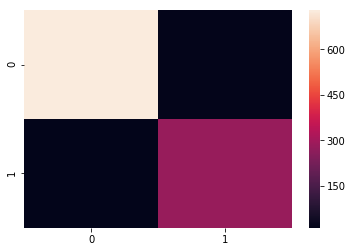

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix)
plt.show()

In [117]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB(priors=None)

In [118]:
y_pred = clf.predict(x_test)

In [119]:
score = accuracy_score(y_pred, y_test)
score

0.9623188405797102